## Importing Libraries


In [1]:
#!pip install prettytable

In [2]:
from prettytable import PrettyTable
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,f1_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'prettytable'

In [3]:
# Importing Libraries

In [4]:
audit_risk = pd.read_csv("audit_risk.csv")
trial = pd.read_csv("trial.csv")

In [5]:
audit_risk.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [6]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [7]:
audit_risk.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [8]:
trial.dtypes

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A            int64
PARA_B           float64
SCORE_B            int64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

In [9]:
#Renaming columns
trial.columns = ['Sector_score','LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B',
       'Score_B',  'TOTAL', 'numbers', 'Marks',
       'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial' ]

In [10]:
trial['Score_A'] = trial['Score_A']/10
trial['Score_B'] = trial['Score_B']/10

In [11]:
# Find the common columns
same_columns = list(set(audit_risk.columns) & set(trial.columns))
#same_columns

In [12]:
# Merge two Dataframes  on common columns  using outer join
merged_df = pd.merge(audit_risk, trial, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'])


## Data Cleaning and Preprocessing

In [13]:
df = merged_df.drop(['Risk_trial'], axis = 1)

In [14]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,...,810.000000,810.0,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,21.406716,2.348556,0.344938,1.294561,10.347643,0.308395,6.068334,12.665829,5.064815,0.222716,...,0.567407,0.5,6.881682,0.379012,2.227160,2.871605,2.493827,0.028395,2.059259,2.160494
std,24.760476,5.579501,0.173042,3.378180,49.067564,0.167741,29.461510,50.292444,0.259188,0.078789,...,0.437573,0.0,37.871031,0.485441,0.787889,1.574145,1.219166,0.180464,0.367323,0.666277
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.070000,0.200000,0.014000,0.000000,0.200000,0.000000,0.430000,5.000000,0.200000,...,0.400000,0.5,0.312900,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.820000,0.200000,0.164000,0.335000,0.200000,0.067000,1.290000,5.000000,0.200000,...,0.400000,0.5,0.470800,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.397500,0.600000,1.438500,2.985000,0.400000,1.347000,7.337500,5.000000,0.200000,...,0.400000,0.5,2.882700,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,5.800000,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


 ### Creating a separate testdata before preprocessing

In [16]:
# Shuffle the dataset to ensure randomness
df = df.sample(frac=1, random_state=5).reset_index(drop=True)

# Split the dataset into training and test sets
test_size = 0.3
split_idx = int(len(df) * (1 - test_size))
train_data = df[:split_idx]
test_data = df[split_idx:]

In [17]:
test_data['LOCATION_ID'] = test_data['LOCATION_ID'].astype(float)

In [18]:
test_labels=test_data['Risk']
test_data = test_data.drop(['Risk'], axis=1)

In [19]:
train_data.shape, test_data.shape

((567, 33), (243, 32))

In [20]:
train_data['Risk'].value_counts()

0    350
1    217
Name: Risk, dtype: int64

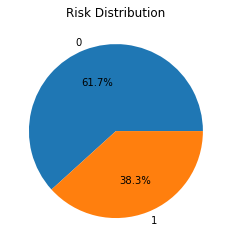

In [21]:
risk_counts = train_data['Risk'].value_counts()

# Plot a pie chart of the counts
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%')
plt.title('Risk Distribution')
plt.show()

In [22]:
# Compute the class distribution
class_distribution = train_data['Risk'].value_counts()

# Calculate the percentage of each class
class_percentage = class_distribution / len(train_data) * 100

# Check if the dataset is balanced
if max(class_percentage) - min(class_percentage) < 10:
    print('The dataset is balanced.')
else:
    print('The dataset is imbalanced.')

The dataset is imbalanced.


In [23]:

# Separate majority and minority classes
majority_class = train_data[train_data.Risk==0]
minority_class = train_data[train_data.Risk==1]

# Downsample majority class
downsampled_majority = resample(majority_class, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority_class), # match minority n
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
balanced_data = pd.concat([downsampled_majority, minority_class])


In [24]:
balanced_data.shape

(434, 33)

In [25]:
# Compute the class distribution
class_distribution = balanced_data['Risk'].value_counts()

# Calculate the percentage of each class
class_percentage = class_distribution / len(balanced_data) * 100

# Check if the dataset is balanced
if max(class_percentage) - min(class_percentage) < 10:
    print('The dataset is balanced.')
else:
    print('The dataset is imbalanced.')

The dataset is balanced.


In [26]:
balanced_data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
Marks             0
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History_score     0
dtype: int64

In [27]:
#Replacing the missing value by the median of the column
balanced_data['Money_Value'] = balanced_data['Money_Value'].fillna(balanced_data['Money_Value'].median())

Drop The values for 'Detection_Risk' and 'Risk_F' are the same across all columns. 

In [28]:
train_data= train_data.drop(['Detection_Risk', 'Risk_F'], axis = 1) 
test_data= test_data.drop(['Detection_Risk', 'Risk_F'], axis = 1) 


LOCATION_ID has object data type with numerical values in the column. Non-number values needed.

In [29]:
print("Non-numeric values in LOCATION_ID: ",    
len(train_data[(train_data["LOCATION_ID"] == 'LOHARU') | (train_data["LOCATION_ID"] ==  'NUH') | (train_data["LOCATION_ID"] == 'SAFIDON')]))


Non-numeric values in LOCATION_ID:  3


Delete rows containing three values in the LOCATION_ID field, with undetermined sequencing.

In [30]:
train_data = train_data[(train_data.LOCATION_ID != 'LOHARU')]
train_data = train_data[(train_data.LOCATION_ID != 'NUH')]
train_data = train_data[(train_data.LOCATION_ID != 'SAFIDON')]


Dropping duplicate values if any. Here the rows which intersected with both dataframes get deleted.



In [31]:
# Remove duplicate rows from train_data
train_data.drop_duplicates(keep='first', inplace=True)

# Get the number of rows in the updated dataset
num_rows = len(train_data)

# Print the updated number of rows
print("Number of rows in the dataset after removing duplicates: ", num_rows)


Number of rows in the dataset after removing duplicates:  544


## Exploratory Data Analysis

In [32]:
train_data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,...,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,20.707555,2.641985,0.350735,1.465051,11.730584,0.314706,6.906911,14.327349,5.068934,0.223162,...,19.405425,0.582721,8.409596,0.393382,2.231618,2.915441,2.551471,0.033088,2.069853,2.169118
std,24.539930,6.506257,0.174422,3.936605,58.260996,0.171024,34.976781,59.516565,0.283574,0.080378,...,63.103481,0.438055,45.687037,0.488950,0.803785,1.594252,1.274888,0.198542,0.405636,0.697854
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,1.400000,0.400000,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.237500,0.200000,0.047500,0.000000,0.200000,0.000000,0.555000,5.000000,0.200000,...,1.593500,0.400000,0.318700,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.865000,0.200000,0.173000,0.390000,0.200000,0.078000,1.380000,5.000000,0.200000,...,2.207000,0.400000,0.586000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.460000,0.600000,1.476000,3.575000,0.400000,1.995000,7.822500,5.000000,0.200000,...,10.663500,0.400000,3.323100,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,801.262000,4.800000,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


In [33]:
#Unique values in LOCATION_ID column
train_data["LOCATION_ID"].unique()

array(['19', '14', '5', '2', '16', '28', '9', '11', '27', '13', '4', '39',
       '31', '32', '8', '22', '29', '18', '15', '6', '12', '1', '21', '3',
       '43', '25', '42', '36', '37', '7', '17', '20', '30', '40', '38',
       '23', '35'], dtype=object)

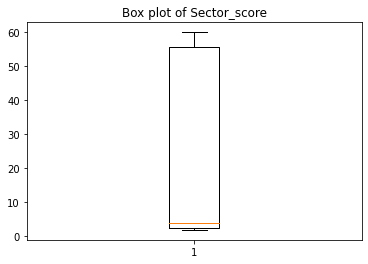

In [34]:
#Check outlliers 
# Box plot of 'Money_Value'
plt.boxplot(train_data['Sector_score'])
plt.title('Box plot of Sector_score')
plt.show()


In [35]:

# Calculate the correlation matrix
corr = train_data.corr()

# Create a diverging colormap for the heatmap
cm = sns.diverging_palette(100, 20, sep=5, as_cmap=True) 

# Create a styled correlation heatmap with background gradient
corr.style.background_gradient(cmap=cm).set_precision(2)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Sector_score,1.00,-0.21,-0.42,-0.21,-0.13,-0.25,-0.12,-0.15,-0.15,-0.17,-0.16,-0.11,-0.31,-0.11,-0.14,-0.08,-0.16,-0.13,-0.14,-0.35,-0.17,-0.18,-0.09,-0.41,-0.17,-0.31,-0.14,-0.08,-0.08,-0.14
PARA_A,-0.21,1.00,0.48,1.00,0.14,0.35,0.14,0.24,0.13,0.14,0.14,0.46,0.28,0.46,0.16,0.04,0.15,0.15,0.17,0.42,0.48,0.18,0.21,0.37,0.14,0.28,0.16,0.04,0.04,0.17
Score_A,-0.42,0.48,1.00,0.48,0.23,0.58,0.23,0.28,0.23,0.27,0.26,0.20,0.48,0.20,0.11,0.10,0.13,0.23,0.26,0.72,0.31,0.22,0.20,0.62,0.27,0.48,0.11,0.10,0.10,0.26
Risk_A,-0.21,1.00,0.48,1.00,0.14,0.36,0.14,0.25,0.13,0.14,0.14,0.46,0.28,0.46,0.16,0.04,0.15,0.15,0.17,0.43,0.48,0.18,0.21,0.37,0.14,0.28,0.16,0.04,0.04,0.17
PARA_B,-0.13,0.14,0.23,0.14,1.00,0.32,1.00,0.99,0.19,0.22,0.21,0.11,0.30,0.11,0.11,0.03,0.10,0.25,0.32,0.38,0.65,0.22,0.90,0.24,0.22,0.30,0.11,0.03,0.03,0.32
Score_B,-0.25,0.35,0.58,0.36,0.32,1.00,0.32,0.36,0.25,0.29,0.28,0.20,0.58,0.19,0.01,0.12,0.04,0.25,0.31,0.90,0.35,0.16,0.20,0.66,0.29,0.58,0.01,0.13,0.12,0.31
Risk_B,-0.12,0.14,0.23,0.14,1.00,0.32,1.00,0.99,0.19,0.22,0.21,0.11,0.30,0.11,0.11,0.03,0.10,0.25,0.32,0.38,0.65,0.22,0.90,0.24,0.22,0.30,0.11,0.03,0.03,0.32
TOTAL,-0.15,0.24,0.28,0.25,0.99,0.36,0.99,1.00,0.20,0.23,0.22,0.16,0.32,0.16,0.12,0.03,0.11,0.25,0.33,0.41,0.68,0.23,0.90,0.28,0.23,0.32,0.12,0.04,0.03,0.33
numbers,-0.15,0.13,0.23,0.13,0.19,0.25,0.19,0.20,1.00,0.89,0.95,0.17,0.41,0.17,0.15,0.04,0.17,0.27,0.21,0.48,0.25,0.28,0.22,0.29,0.89,0.41,0.15,-0.01,0.04,0.21
Score_B.1,-0.17,0.14,0.27,0.14,0.22,0.29,0.22,0.23,0.89,1.00,0.99,0.21,0.48,0.21,0.20,0.04,0.21,0.31,0.26,0.55,0.30,0.33,0.28,0.34,1.00,0.48,0.20,-0.00,0.04,0.26


In [36]:
train_data.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
TOTAL            0
numbers          0
Score_B.1        0
Risk_C           0
Money_Value      1
Score_MV         0
Risk_D           0
District_Loss    0
PROB             0
RiSk_E           0
History          0
Prob             0
Score            0
Inherent_Risk    0
CONTROL_RISK     0
Audit_Risk       0
Risk             0
Marks            0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History_score    0
dtype: int64

In [37]:
train_data.shape

(544, 31)

In [38]:
train_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,1.85,19,1.16,0.4,0.464,0.00,0.2,0.000,1.16,5.0,...,2.686,1.2,1.6116,1,2,2,6,0,2,2
1,3.89,14,0.00,0.2,0.000,1.03,0.2,0.206,1.03,5.0,...,1.606,0.4,0.3212,0,2,2,2,0,2,2
2,2.37,5,1.29,0.4,0.516,0.13,0.2,0.026,1.42,5.0,...,1.942,0.4,0.3884,0,2,2,2,0,2,2
3,15.56,2,20.65,0.6,12.390,0.00,0.2,0.000,0.00,6.0,...,255.976,1.6,204.7808,1,6,6,6,0,2,4
4,1.99,16,1.82,0.4,0.728,0.00,0.2,0.000,1.82,5.0,...,53.606,0.8,21.4424,1,2,6,4,0,2,2


In [39]:
# Replace NaN values with the median
train_data = train_data.fillna(train_data.median())
# Replace infinity values with a very large number
train_data = train_data.replace([np.inf, -np.inf], np.finfo(np.float32).max)

#### Spliling train and validation set

In [40]:
features  = train_data.drop(["Risk"], axis = 1)
y = train_data["Risk"]

In [41]:
features_train, features_val, labels_train, labels_val = train_test_split(features, y, 
                                                test_size=0.25, random_state=5)

In [42]:
features.dtypes

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
Score_A          float64
Risk_A           float64
PARA_B           float64
Score_B          float64
Risk_B           float64
TOTAL            float64
numbers          float64
Score_B.1        float64
Risk_C           float64
Money_Value      float64
Score_MV         float64
Risk_D           float64
District_Loss      int64
PROB             float64
RiSk_E           float64
History            int64
Prob             float64
Score            float64
Inherent_Risk    float64
CONTROL_RISK     float64
Audit_Risk       float64
Marks              int64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History_score      int64
dtype: object

#### Standardizing our train set

In [43]:
scaler = StandardScaler()
scaler.fit(features_train[:])
features_train[:] = scaler.transform(features_train[:])
features_val[:] = scaler.transform(features_val[:])

## Machine learning models
### (a).Model Training

## 1. Random forest

#### 1(a). Stratified cross-validation

In [44]:
#  Train a random forest classifier with default hyperparameters
rfc1 = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5)
cv_scores1 = cross_val_score(rfc1, features_train, labels_train, cv=skf)
print("Mean cross-validation score before tuning:", cv_scores1.mean())
print("Standard deviation before tuning:", cv_scores1.std())

Mean cross-validation score before tuning: 0.9950918398072869
Standard deviation before tuning: 0.006011432562947457


In [45]:
# Predict class labels for validation set using stratified cross-validation
y_pred = cross_val_predict(rfc1, features_val, labels_val, cv=skf)

In [46]:
# Calculate the accuracy of the predictions
accuracy = accuracy_score(labels_val, y_pred)

# Report the accuracy
print("validation Accuracy of the random forest model on the val data: {:.2f}%".format(accuracy*100))

validation Accuracy of the random forest model on the val data: 99.26%


#### 1(b). Grid search

In [47]:
#Train a grid search object to find the best hyperparameters
param_grid = {
    'n_estimators': [50,150, 200, 250],
    'max_depth': [2,5, 10, 13,15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

rfc2 = RandomForestClassifier()
cv = KFold(n_splits=10)
grid_search = GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(features_train, labels_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Mean cross-validation score after tuning:", grid_search.best_score_)
print("Standard deviation of cross-validation scores:", grid_search.cv_results_['std_test_score'][grid_search.best_index_])

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Mean cross-validation score after tuning: 1.0
Standard deviation of cross-validation scores: 0.0


#### 1(c). Prediction on the validation set Random forest

In [48]:
# Predict the labels of the validation set using the best model obtained from grid search
best_rf = grid_search.best_estimator_
predicted_labels = best_rf.predict(features_val)

# Report the accuracy, precision, and recall on the validation set
accuracy = accuracy_score(labels_val, predicted_labels)
precision = precision_score(labels_val, predicted_labels)
recall = recall_score(labels_val, predicted_labels)
f1_score = f1_score(labels_val, predicted_labels)
report = classification_report(labels_val, predicted_labels)
print("Accuracy on val set:", accuracy)
print("Precision on val set:", precision)
print("Recall on val set:", recall)
print("F1 score on val set:", f1_score)

Accuracy on val set: 0.9926470588235294
Precision on val set: 1.0
Recall on val set: 0.9795918367346939
F1 score on val set: 0.9896907216494846


In [49]:
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        87
           1       1.00      0.98      0.99        49

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136



#### 1(d).  Prediction on the test data Random forest

In [50]:
# Predict the labels of the test set using the best model obtained from grid search
best_rf = grid_search.best_estimator_
predicted_labels = best_rf.predict(test_data)

# Report the accuracy, precision, and recall on the test data
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
report = classification_report(test_labels, predicted_labels)

print("Accuracy on test set:", accuracy)
print("Precision on test set:", precision)
print("Recall on test set:", recall)


Accuracy on test set: 0.37037037037037035
Precision on test set: 0.37037037037037035
Recall on test set: 1.0


In [51]:
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       153
           1       0.37      1.00      0.54        90

    accuracy                           0.37       243
   macro avg       0.19      0.50      0.27       243
weighted avg       0.14      0.37      0.20       243



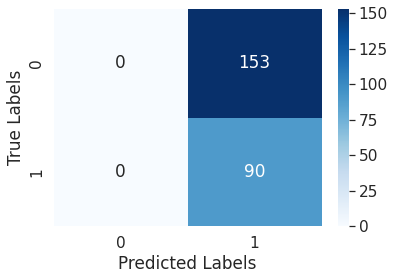

In [52]:
# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### 1(e). Feature importance

In [53]:
rfc1.fit(features_train, labels_train) # Fit the estimator first
skf = StratifiedKFold(n_splits=5)
cv_scores1 = cross_val_score(rfc1, features_train, labels_train, cv=skf)
# Train a new random forest classifier with the best hyperparameters
rfc3 = RandomForestClassifier(**grid_search.best_params_)
rfc3.fit(features_train, labels_train)

#Obtain the feature importances of the two random forest classifiers
importances1 = rfc1.feature_importances_
importances3 = rfc3.feature_importances_


In [54]:
feature_names = ['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
                 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
                 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
                 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
                 'Detection_Risk', 'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks',
                 'District', 'Loss', 'LOSS_SCORE', 'History_score']

In [55]:
# Sort the features by importance in descending order for both sets of importances
indices1 = np.argsort(importances1)[::-1]
indices3 = np.argsort(importances3)[::-1]

# Create table headers
headers = ['Rank', 'Feature', 'Importance (Before Tuning)', 'Importance (After Tuning)']

# Create table rows
rows = []
for f in range(features_train.shape[1]):
    rows.append([
        f+1, 
        feature_names[f], 
        importances1[indices1[f]], 
        importances3[indices3[f]]
    ])

# Print the table
print(tabulate(rows, headers=headers))


  Rank  Feature           Importance (Before Tuning)    Importance (After Tuning)
------  --------------  ----------------------------  ---------------------------
     1  Sector_score                     0.222106                     0.212544
     2  PARA_A                           0.197128                     0.182192
     3  Score_A                          0.0945566                    0.124966
     4  Risk_A                           0.0774846                    0.0574773
     5  PARA_B                           0.0699048                    0.0573737
     6  Score_B                          0.0694996                    0.0479728
     7  Risk_B                           0.0472656                    0.0448302
     8  TOTAL                            0.0407822                    0.041004
     9  numbers                          0.0237427                    0.0346021
    10  Score_B.1                        0.0227636                    0.0319622
    11  Risk_C                          

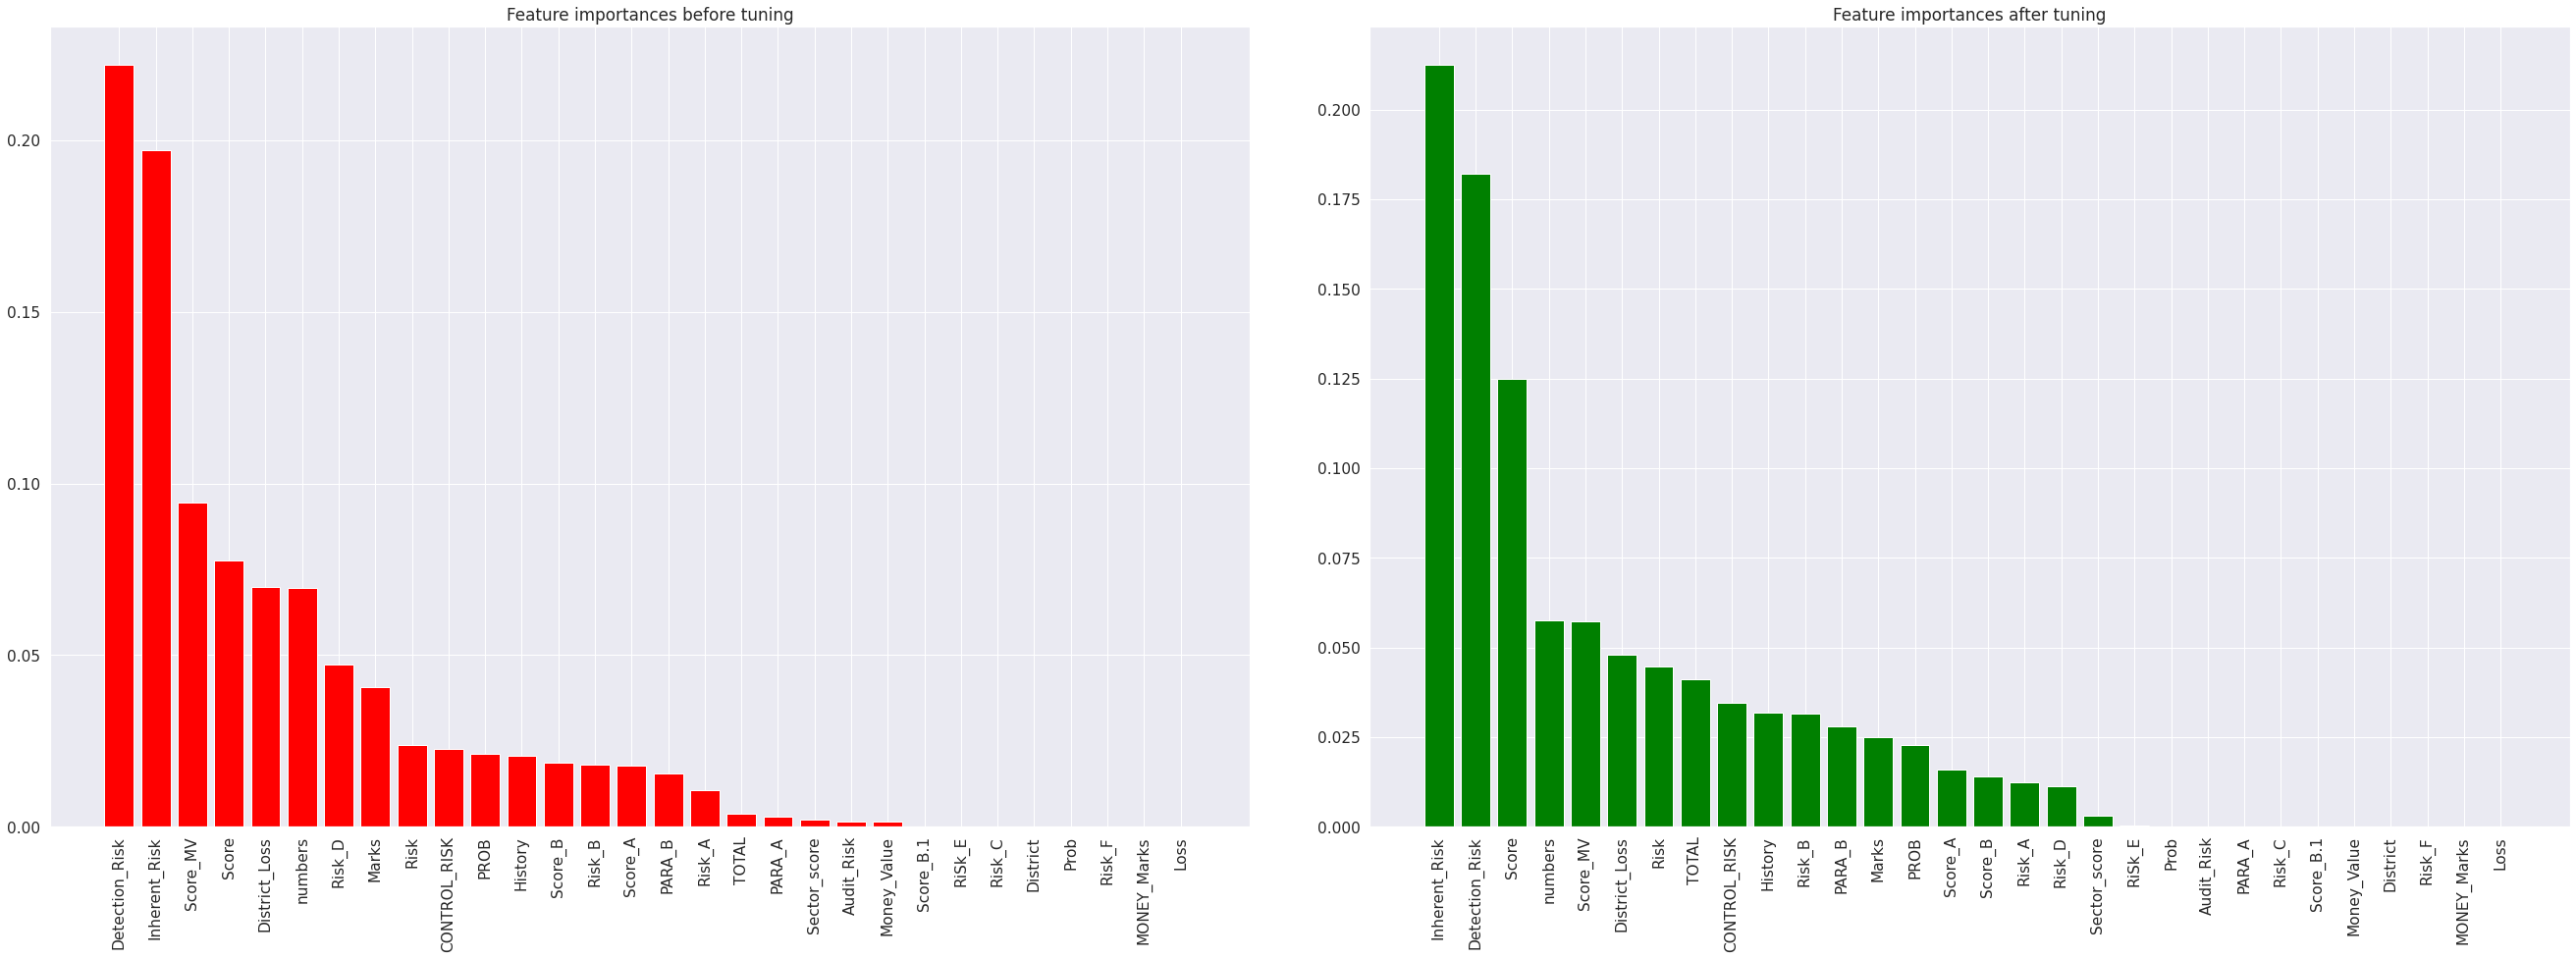

In [56]:
# Create subplots for before and after tuning
fig, axs = plt.subplots(ncols=2, figsize=(46, 15))

# Plot the feature importances before tuning
axs[0].bar(range(features_train.shape[1]), importances1[indices1], color='red')
axs[0].set_xticks(range(features_train.shape[1]))
axs[0].set_xticklabels(np.array(feature_names)[indices1], rotation=90)
axs[0].set_title("Feature importances before tuning")

# Plot the feature importances after tuning
axs[1].bar(range(features_train.shape[1]), importances3[indices3], color='green')
axs[1].set_xticks(range(features_train.shape[1]))
axs[1].set_xticklabels(np.array(feature_names)[indices3], rotation=90)
axs[1].set_title("Feature importances after tuning")

# Adjust spacing between the subplots
plt.subplots_adjust(wspace=0.1)

# Display the plot
plt.show()


## 2. SVC

In [57]:
# Define the hyperparameters for the SVM
parameters_svm = {'kernel': ('linear', 'poly', 'rbf'),
                  'C': [0.1, 1, 10],
                  'gamma': ['scale', 'auto'],
                  'degree': [2, 3, 4],
                  'coef0': [0, 1, 2],
                  'shrinking': [True, False],
                  'tol': [0.001, 0.0001, 0.00001]}

# Create the SVM classifier
svm_clf = SVC()

# Create a grid search object with 10-fold cross-validation
grid_search_svm = GridSearchCV(svm_clf, parameters_svm, cv=10)

# Fit the grid search object on the training data
grid_search_svm.fit(features_train, labels_train)

# Print the best hyperparameters
print("Best hyperparameters for SVM: ", grid_search_svm.best_params_)

# Calculate the mean cross-validation score and standard deviation of the best SVM model
svm_scores = cross_val_score(grid_search_svm.best_estimator_, features_train, labels_train, cv=10)
svm_mean = np.mean(svm_scores)
svm_std = np.std(svm_scores)
print("SVM cross-validation scores: ", svm_scores)
print("SVM cross-validation mean score: ", svm_mean)
print("SVM cross-validation standard deviation: ", svm_std)


Best hyperparameters for SVM:  {'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True, 'tol': 0.001}
SVM cross-validation scores:  [1.         1.         0.97560976 1.         0.97560976 0.97560976
 1.         0.95121951 1.         1.        ]
SVM cross-validation mean score:  0.9878048780487806
SVM cross-validation standard deviation:  0.016361473006096035


#### 2(a). Prediction on the validation data SVC

In [58]:
# Predict the labels of the validation set using the best model obtained from grid search
best_svm = grid_search_svm.best_estimator_
predicted_labels = best_svm.predict(features_val)

# Report the accuracy, precision, and recall on the validation set
accuracy = accuracy_score(labels_val, predicted_labels)
precision = precision_score(labels_val, predicted_labels)
recall = recall_score(labels_val, predicted_labels)
report = classification_report(labels_val, predicted_labels)
print("Accuracy on validation set:", accuracy)
print("Precision on validation set:", precision)
print("Recall on validation set:", recall)


Accuracy on validation set: 0.9632352941176471
Precision on validation set: 0.94
Recall on validation set: 0.9591836734693877


In [59]:
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        87
           1       0.94      0.96      0.95        49

    accuracy                           0.96       136
   macro avg       0.96      0.96      0.96       136
weighted avg       0.96      0.96      0.96       136



#### 2(b). Prediction on the test data SVC

In [60]:
# Predict the labels of the test data using the best model obtained from grid search
best_svm = grid_search_svm.best_estimator_
predicted_labels = best_svm.predict(test_data)

# Report the accuracy, precision, and recall on the test data
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
report = classification_report(test_labels, predicted_labels)
print("Accuracy on test set:", accuracy)
print("Precision on test set:", precision)
print("Recall on test set:", recall)


Accuracy on test set: 0.6213991769547325
Precision on test set: 0.49444444444444446
Recall on test set: 0.9888888888888889


In [61]:
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.41      0.57       153
           1       0.49      0.99      0.66        90

    accuracy                           0.62       243
   macro avg       0.74      0.70      0.62       243
weighted avg       0.80      0.62      0.61       243



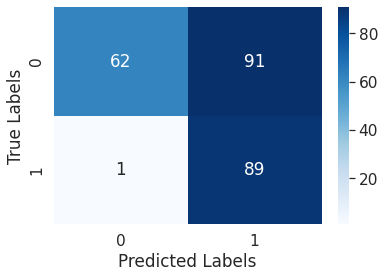

In [62]:
# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 3. KNeighbors Classifier

In [63]:
# Define the hyperparameters for the KNN
parameters_knn = {
    'n_neighbors': [3, 7, 9, 15], 
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50]
    
}

# Create the KNN classifier
knn_clf = KNeighborsClassifier()

# Create a grid search object with 10-fold cross-validation
grid_search_knn = GridSearchCV(knn_clf, parameters_knn, cv=10)

# Fit the grid search object on the training data
grid_search_knn.fit(features_train, labels_train)

# Print the best hyperparameters
print("Best hyperparameters for KNN: ", grid_search_knn.best_params_)

# Calculate the mean cross-validation score of the best KNN model
knn_scores = cross_val_score(grid_search_knn.best_estimator_, features_train, labels_train, cv=10).mean()
print("KNN cross-validation score: ", knn_scores)
# Calculate the mean and standard deviation of the cross-validation scores
knn_mean_score = knn_scores.mean()
knn_std_score = knn_scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean cross-validation score of the best KNN model: {:.2f}".format(knn_mean_score))
print("Standard deviation of the cross-validation scores of the best KNN model: {:.2f}".format(knn_std_score))


Best hyperparameters for KNN:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
KNN cross-validation score:  0.965731707317073
Mean cross-validation score of the best KNN model: 0.97
Standard deviation of the cross-validation scores of the best KNN model: 0.00


#### 3(a). Prediction on the validation data KNN

In [64]:
# Predict the labels of the validation set using the best model obtained from grid search
best_knn = grid_search_knn.best_estimator_
predicted_labels = best_knn.predict(features_val)

# Report the accuracy, precision, and recall on the validation set
accuracy = accuracy_score(labels_val, predicted_labels)
precision = precision_score(labels_val, predicted_labels)
recall = recall_score(labels_val, predicted_labels)
report = classification_report(labels_val, predicted_labels)
print("Accuracy on validation set:", accuracy)
print("Precision on validation set:", precision)
print("Recall on validation set:", recall)

Accuracy on validation set: 0.9411764705882353
Precision on validation set: 0.9361702127659575
Recall on validation set: 0.8979591836734694


In [65]:
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        87
           1       0.94      0.90      0.92        49

    accuracy                           0.94       136
   macro avg       0.94      0.93      0.94       136
weighted avg       0.94      0.94      0.94       136



#### 3(b). Prediction on the test data KNN

In [66]:
# Predict the labels of the test data using the best model obtained from grid search
best_knn = grid_search_knn.best_estimator_
predicted_labels = best_knn.predict(test_data)

# Report the accuracy, precision, and recall on the test data
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
report = classification_report(test_labels, predicted_labels)
print("Accuracy on test set:", accuracy)
print("Precision on test set:", precision)
print("Recall on test set:", recall)

Accuracy on test set: 0.720164609053498
Precision on test set: 0.5733333333333334
Recall on test set: 0.9555555555555556


In [67]:
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72       153
           1       0.57      0.96      0.72        90

    accuracy                           0.72       243
   macro avg       0.77      0.77      0.72       243
weighted avg       0.81      0.72      0.72       243



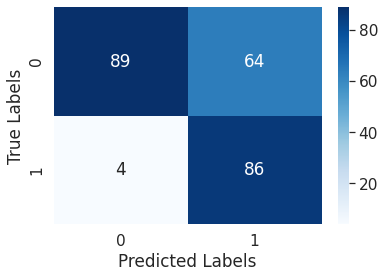

In [68]:
# Generate the confusion matrix
matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [69]:
# Define the table headers
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall","F1-Score"]
# accuray, precision and recall on the separate test data
table.add_row(["Random Forest", "{:.2%}".format(0.3704),"{:.2%}".format( 0.3704), "{:.2%}".format(1.0),"{:.2%}".format( 0.54)])
table.add_row(["SVM", "{:.2%}".format(0.6214), "{:.2%}".format(0.4944), "{:.2%}".format(0.9888),"{:.2%}".format( 0.66)])
table.add_row(["KNN", "{:.2%}".format(0.7202), "{:.2%}".format(0.5733), "{:.2%}".format(0.9556), "{:.2%}".format(0.72)])
table

Model,Accuracy,Precision,Recall,F1-Score
Random Forest,37.04%,37.04%,100.00%,54.00%
SVM,62.14%,49.44%,98.88%,66.00%
KNN,72.02%,57.33%,95.56%,72.00%
